<a href="https://colab.research.google.com/github/olgasherbiena/KPI/blob/MMSP/lisagu_figurs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Фігура Лісажу першого рангу
#### w1/w2=1

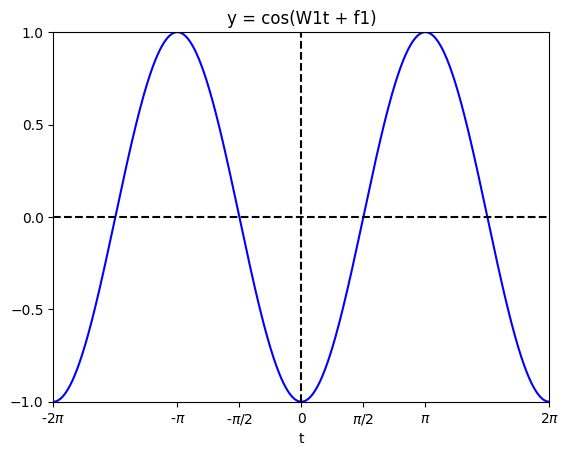

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(-2*np.pi, 2*np.pi, 0.01)
wx = 1
wy = 1.01
fx = 1*np.pi/1
fy = 0
x = np.cos(wx*t + fx)
y = np.cos(wy*t + fy)

# перший графік у лівому subplot
plt.plot(t, x, 'b-')
plt.axis([-np.pi, np.pi, -1, 1])
plt.yticks(np.arange(-1, 1.1, 0.5))
plt.xticks([-2*np.pi, -np.pi, -np.pi/2, 0, np.pi/2, np.pi, 2*np.pi], [r'-2$\pi$', r'-$\pi$', r'-$\pi/2$', '0', r'$\pi/2$', r'$\pi$', r'$2\pi$'])
plt.title('y = cos(W1t + f1)')
plt.xlabel('t')
plt.plot([-2*np.pi, 2*np.pi], [0, 0], 'k--')
plt.plot([0,0], [-1,1], 'k--')
plt.show()



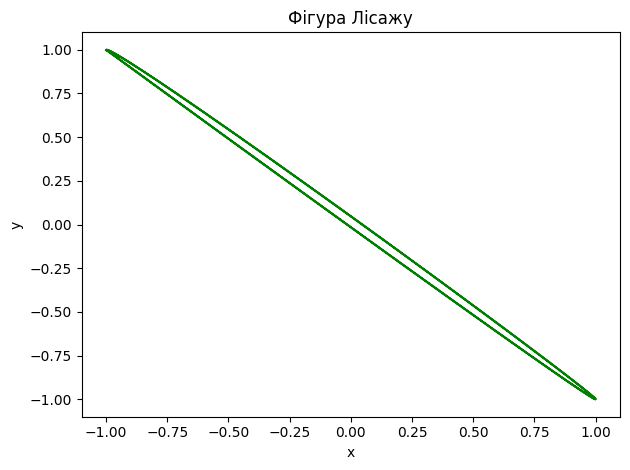

In [ ]:

plt.plot(x, y, 'g-')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Фігура Лісажу')

plt.tight_layout()
plt.show()

# Поліном Чебишева

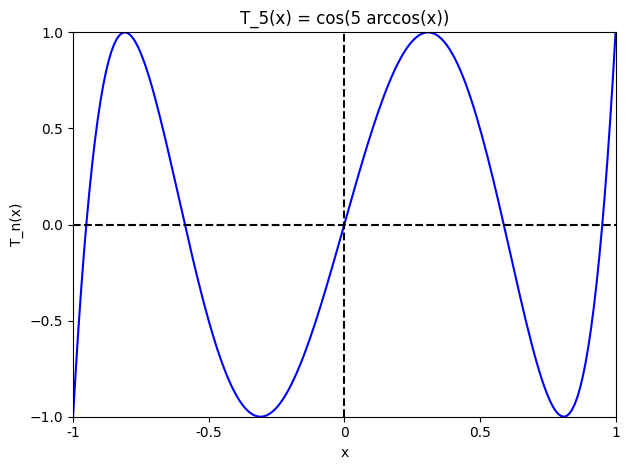

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Параметри
n = 5  # порядок
x = np.linspace(-1, 1, 200)
T = np.cos(n * np.arccos(x))

plt.plot(x, T, 'b-')
plt.axis([-1, 1, -1, 1])
plt.xticks([-1, -0.5, 0, 0.5, 1], ['-1', '-0.5', '0', '0.5', '1'])
plt.yticks(np.arange(-1, 1.1, 0.5))
plt.title(f'T_{n}(x) = cos({n} arccos(x))')
plt.xlabel('x')
plt.ylabel('T_n(x)')

# Горизонтальна та вертикальна лінії
plt.axhline(0, color='k', linestyle='--')
plt.axvline(0, color='k', linestyle='--')

plt.tight_layout()
plt.show()


# Граф Михайлова

/tmp/ipython-input-578996539.py:12: RuntimeWarning: divide by zero encountered in log10
  Im_D = np.log10(np.imag(D_jw))


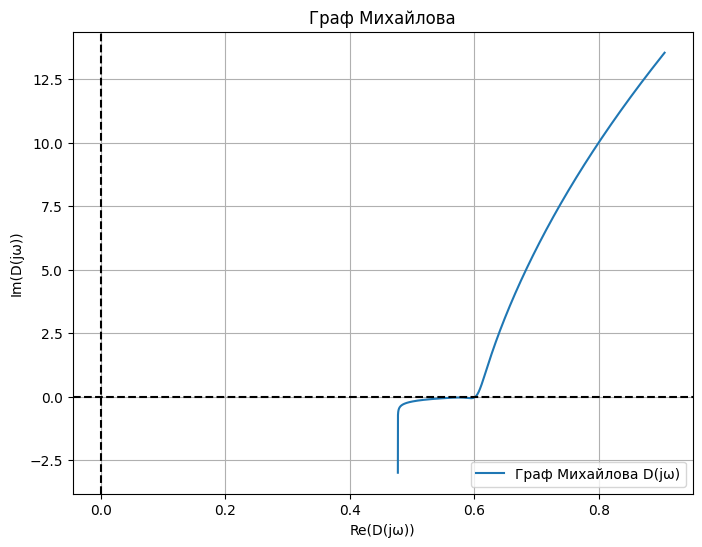

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Частотний вектор
w = np.arange(0, 1.5, 0.001)  # менші значення, бо великі степені швидко ростуть

# Передаточна функція D(jω)
D_jw = (w**4 + 3) + 1j*(w**77 - w**55 + w)  # комплексна форма

# Реальна та уявна частини
Re_D = np.log10(np.real(D_jw))
Im_D = np.log10(np.imag(D_jw))

# Побудова графа Михайлова
plt.figure(figsize=(8,6))
plt.plot(Re_D, Im_D, label='Граф Михайлова D(jω)')
plt.xlabel('Re(D(jω))')
plt.ylabel('Im(D(jω))')
plt.title('Граф Михайлова')
plt.axhline(0, color='k', linestyle='--')
plt.axvline(0, color='k', linestyle='--')
plt.grid(True)
plt.legend()
plt.show()

# Банкомат

In [ ]:
import random

# Ініціалізація банкомату
SUPPORTED_CARD_TYPES = [1, 2]  # допустимі типи карток
SUPPORTED_CODES = [1234, 5678]  # допустимі коди

# Генеруємо випадковий баланс (гривні та копійки)
balance = random.randint(10000, 500000)

# Максимальна кількість спроб вводу коду
MAX_PIN_ATTEMPTS = 3

def atm():
    print("a0: Ласкаво просимо! Вставте картку.")

    # a1: Розпізнання картки
    card_type = int(input("a1: Введіть тип картки (ціле число): "))
    if card_type not in SUPPORTED_CARD_TYPES:
        print("a13: Цей тип картки не підтримується банкоматом.")
        return

    # a2: Запрошення до вводу коду
    pin_attempts = 0
    while pin_attempts < MAX_PIN_ATTEMPTS:
        pin = int(input("a2: Введіть код карти: "))
        # a3: Перевірка коду
        if pin in SUPPORTED_CODES:
            break
        else:
            pin_attempts += 1
            if pin_attempts < MAX_PIN_ATTEMPTS:
                print("a11: Код невірний, спробуйте ще раз.")
            else:
                print("a12: Код введено невірно. Картка заблокована.")
                return

    # a4: Меню операцій
    global balance, balance_hryvni, balance_kopecks
    while True:
        print("\na4: Виберіть операцію:")
        print("1 - Стан рахунку")
        print("2 - Зняття грошей")
        print("3 - Вихід")
        choice = input("Ваш вибір: ")

        match choice:
            case '1':
              balance_hryvni = balance // 100
              balance_kopecks = balance % 100
                # a5: Вивід стану рахунку
              print(f"a5: Ваш баланс: {balance_hryvni} грн {balance_kopecks} коп.")

            case '2':
                # a6: Запит суми для зняття
                withdraw_hryvni = int(input("a6: Введіть суму гривень для зняття: "))
                withdraw_kopecks = int(input("a6: Введіть суму копійок для зняття: "))
                withdraw_amount = withdraw_hryvni*100 + withdraw_kopecks

                # a7: Перевірка наявності грошей
                if withdraw_amount <= balance:
                    # a8: Видача готівки та корегування рахунку
                    balance -= withdraw_amount
                    balance_hryvni = int(balance)
                    balance_kopecks = int(round((balance - balance_hryvni) * 100))
                    print(f"a8: Видано: {withdraw_hryvni} грн {withdraw_kopecks} коп.")
                    print(f"a5: Новий баланс: {balance_hryvni} грн {balance_kopecks} коп.")
                else:
                    # a9: Недостатньо коштів
                    print("a9: Недостатньо коштів на рахунку.")

            case '3':
                # a10: Вихід
                print("a10: Дякуємо! До побачення!")
                break

            case _:
                print("Невірний вибір, спробуйте ще раз.")

# Запуск банкомату
atm()


a0: Ласкаво просимо! Вставте картку.
a1: Введіть тип картки (ціле число): 1
a2: Введіть код карти: 1234

a4: Виберіть операцію:
1 - Стан рахунку
2 - Зняття грошей
3 - Вихід
Ваш вибір: 1
a5: Ваш баланс: 3034 грн 12 коп.

a4: Виберіть операцію:
1 - Стан рахунку
2 - Зняття грошей
3 - Вихід
Ваш вибір: 3000
Невірний вибір, спробуйте ще раз.

a4: Виберіть операцію:
1 - Стан рахунку
2 - Зняття грошей
3 - Вихід
Ваш вибір: 1
a5: Ваш баланс: 3034 грн 12 коп.

a4: Виберіть операцію:
1 - Стан рахунку
2 - Зняття грошей
3 - Вихід
Ваш вибір: 1
a5: Ваш баланс: 3034 грн 12 коп.

a4: Виберіть операцію:
1 - Стан рахунку
2 - Зняття грошей
3 - Вихід
Ваш вибір: 2
a6: Введіть суму гривень для зняття: 3000
a6: Введіть суму копійок для зняття: 0
a8: Видано: 3000 грн 0 коп.
a5: Новий баланс: 3412 грн 0 коп.

a4: Виберіть операцію:
1 - Стан рахунку
2 - Зняття грошей
3 - Вихід
Ваш вибір: 1
a5: Ваш баланс: 34 грн 12 коп.

a4: Виберіть операцію:
1 - Стан рахунку
2 - Зняття грошей
3 - Вихід
Ваш вибір: 2
a6: Введіть 

# Передатні функції

In [24]:
import numpy as np
from scipy.signal import tf2zpk, lti, step, impulse, bode
import matplotlib.pyplot as plt

# Початкова передатна функція варіант 4
num = [1, -1, 0, 1]    # p³ - p² + 1
den = [1, 0, 0, 1, 3]  # p⁴ + p + 3

zeros, poles, gain = tf2zpk(num, den)

In [13]:
def format_complex(c):
    """Повертає рядок у вигляді a ± bj або просто a (для дійсних)"""
    if abs(c.imag) < 1e-6:
        return f"{c.real:.3f}"
    sign = '+' if c.imag >= 0 else '-'
    return f"{c.real:.3f} {sign} {abs(c.imag):.3f}j"

In [14]:
zeros_str = "[" + ", ".join(format_complex(z) for z in zeros) + "]"
poles_str = "[" + ", ".join(format_complex(p) for p in poles) + "]"

In [15]:
print("Нулі:", zeros_str)
print("Полюси:", poles_str)
print("Коефіцієнт підсилення:", round(gain, 3))

Нулі: [0.877 + 0.745j, 0.877 - 0.745j, -0.755]
Полюси: [0.936 + 1.069j, 0.936 - 1.069j, -0.936 + 0.781j, -0.936 - 0.781j]
Коефіцієнт підсилення: 1.0


In [17]:
stable_open_loop = np.all(np.real(poles)<0)
print("Стійкість системи: ", stable_open_loop)
print("Дійсні частини полюсів:", np.real(poles))


Стійкість системи:  False
Дійсні частини полюсів: [ 0.93608757  0.93608757 -0.93608757 -0.93608757]


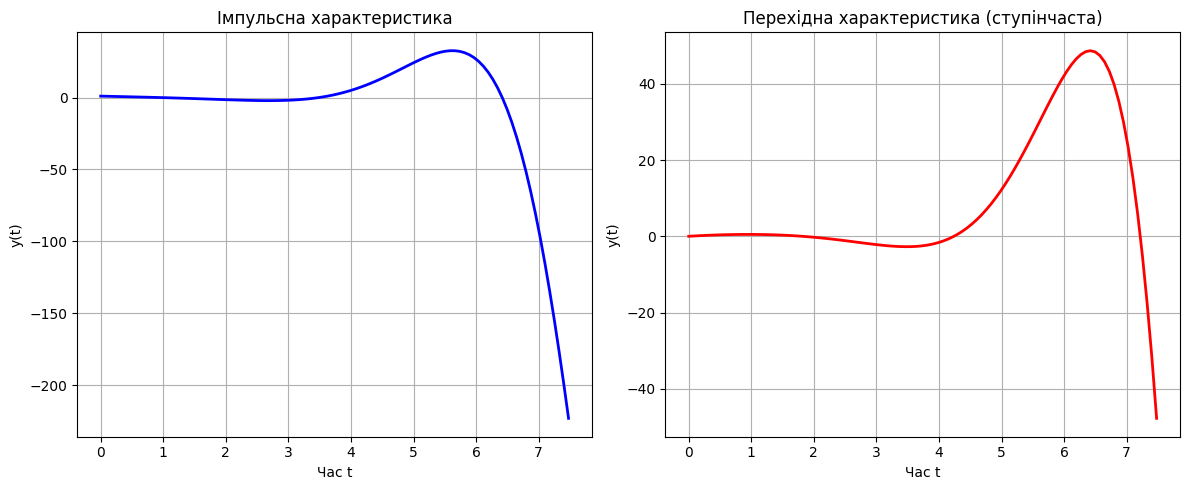

In [25]:
from scipy import signal

sys = signal.lti(num, den)
t_imp, y_imp = signal.impulse(sys)
t_step, y_step = signal.step(sys)
plt.figure (figsize=(12,5))

# Імпульсна характеристика
plt.subplot(1,2,1)
plt.plot(t_imp, y_imp, 'b', lw=2)
plt.title("Імпульсна характеристика")
plt.xlabel("Час t")
plt.ylabel("y(t)")
plt.grid(True)

# Перехідна характеристика
plt.subplot(1,2,2)
plt.plot(t_step, y_step, 'r', lw=2)
plt.title("Перехідна характеристика (ступінчаста)")
plt.xlabel("Час t")
plt.ylabel("y(t)")
plt.grid(True)

plt.tight_layout()
plt.show()


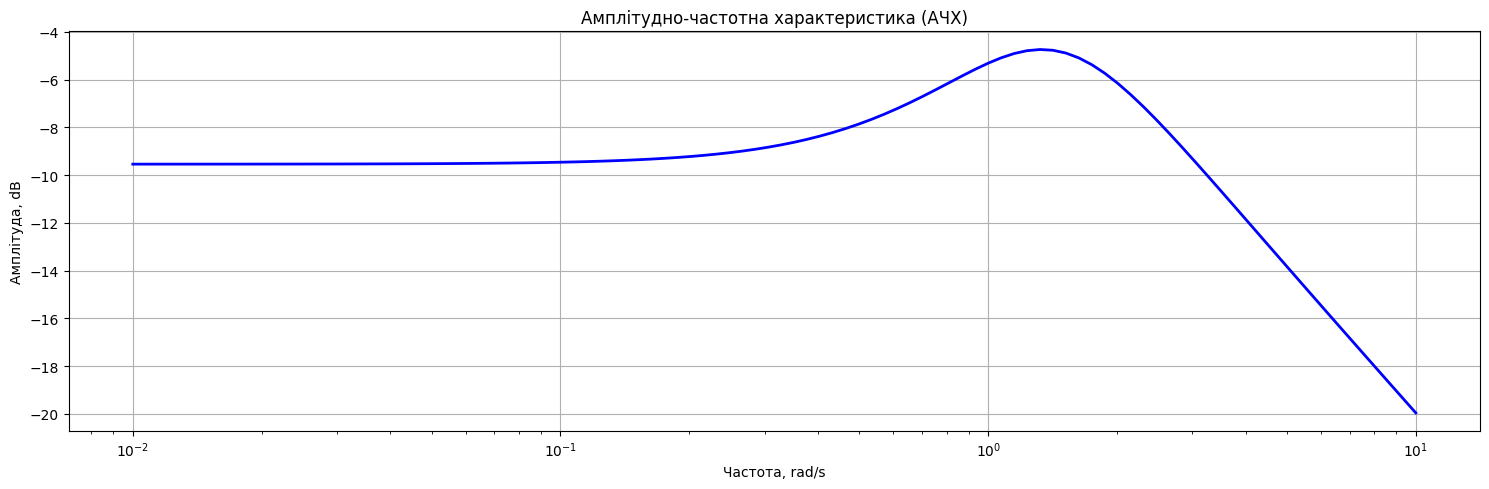

In [37]:
w, mag, phase = signal.bode(sys)  # w - частоти, mag - АЧХ в dB, phase - ФЧХ в градусах

plt.figure(figsize=(15,5))

# АЧХ

plt.semilogx(w, mag, 'b', lw=2)
plt.title("Амплітудно-частотна характеристика (АЧХ)")
plt.xlabel("Частота, rad/s")
plt.ylabel("Амплітуда, dB")
plt.grid(True)



plt.tight_layout()
plt.show()

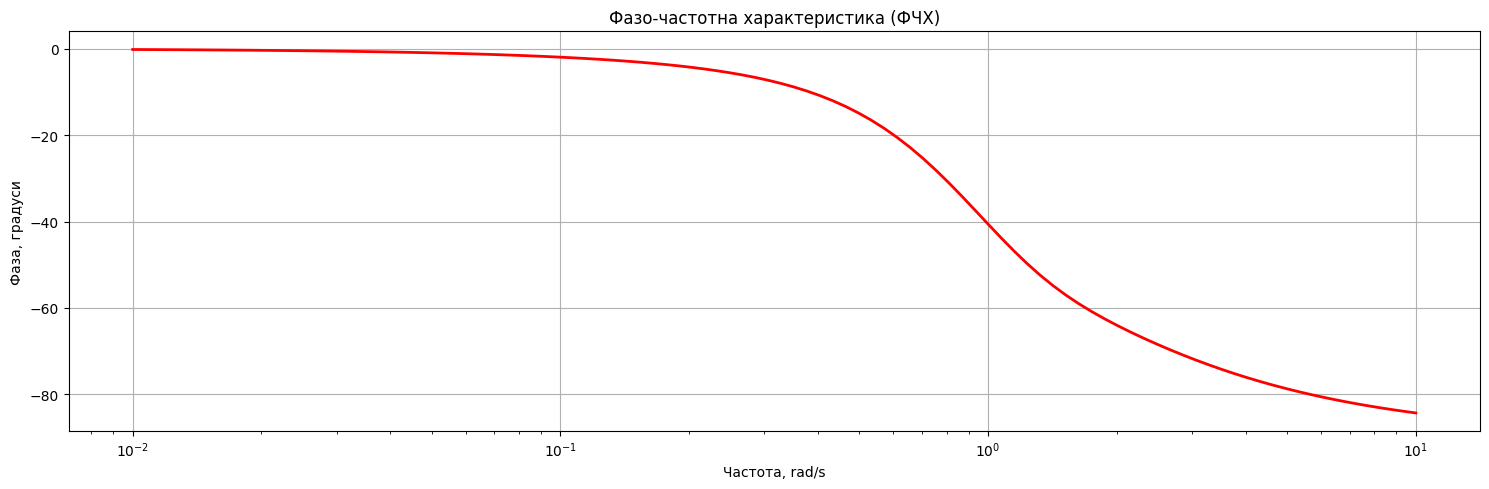

In [36]:
# ФЧХ
plt.figure(figsize=(15,5))
plt.semilogx(w, phase, 'r', lw=2)
plt.title("Фазо-частотна характеристика (ФЧХ)")
plt.xlabel("Частота, rad/s")
plt.ylabel("Фаза, градуси")
plt.grid(True)
plt.tight_layout()
plt.show()

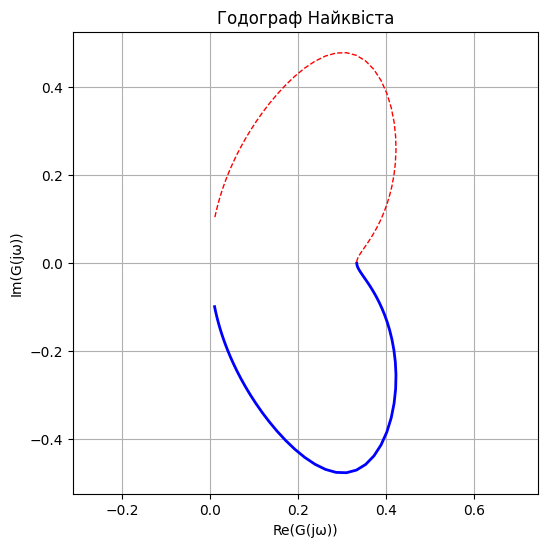

In [6]:
_, H = signal.freqresp(sys, w)  # H - комплексна частотна характеристика

plt.figure(figsize=(6,6))
plt.plot(H.real, H.imag, 'b', lw=2)   # Реальна vs Уявна частина
plt.plot(H.real, -H.imag, 'r', lw=1, linestyle='--')  # дзеркальна частина для повного Найквіста
plt.title("Годограф Найквіста")
plt.xlabel("Re(G(jω))")
plt.ylabel("Im(G(jω))")
plt.grid(True)
plt.axis('equal')  # квадратна шкала, щоб не спотворювати форму
plt.show()

In [8]:
from numpy.linalg import matrix_rank
sys_ss = signal.tf2ss(num, den)
A, B, C, D = sys_ss

print("Матриця A:\n", A)
print("Матриця B:\n", B)
print("Матриця C:\n", C)
print("Матриця D:\n", D)

# ----------------------------
# 3️⃣ КФК (Контрольованість)
# ----------------------------
# Матриця контрольованості: [B, A*B, A^2*B, ...]
n = A.shape[0]
controllability_matrix = B
for i in range(1, n):
    controllability_matrix = np.hstack((controllability_matrix, np.linalg.matrix_power(A, i) @ B))

rank_cont = matrix_rank(controllability_matrix)
print("\nРанг матриці контрольованості:", rank_cont)
if rank_cont == n:
    print("Система контрольована")
else:
    print("Система не контрольована")

# ----------------------------
# 4️⃣ КФС (Спостережуваність)
# ----------------------------
# Матриця спостережуваності: [C; C*A; C*A^2; ...]
observability_matrix = C
for i in range(1, n):
    observability_matrix = np.vstack((observability_matrix, C @ np.linalg.matrix_power(A, i)))

rank_obs = matrix_rank(observability_matrix)
print("\nРанг матриці спостережуваності:", rank_obs)
if rank_obs == n:
    print("Система спостережувана")
else:

    print("Система не спостережувана")

Матриця A:
 [[-0. -0. -1. -3.]
 [ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]]
Матриця B:
 [[1.]
 [0.]
 [0.]
 [0.]]
Матриця C:
 [[ 1. -1.  0.  1.]]
Матриця D:
 [[0.]]

Ранг матриці контрольованості: 4
Система контрольована

Ранг матриці спостережуваності: 4
Система спостережувана


In [18]:
!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 10.2 MB/s eta 0:00:00


<TransferFunction>: sys[4]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  s^3 - s^2 + 1
  -------------
   s^4 + s + 3
z: [ 0.87743883+0.74486177j  0.87743883-0.74486177j -0.75487767+0.j        ]
p: [ 0.93608757+1.06926562j  0.93608757-1.06926562j -0.93608757+0.78050682j
 -0.93608757-0.78050682j]
k: 1.0

p real: [ 0.93608757  0.93608757 -0.93608757 -0.93608757]
unstable
<TransferFunction>: sys[5]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        s^3 - s^2 + 1
  -------------------------
  5.4 s^3 + s^2 + 2 s + 0.2

k: 1.4
p real: [-0.0414212  -0.0414212  -0.10234278]
stable
<StateSpace>: sys[6]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (4): ['x[0]', 'x[1]', 'x[2]', 'x[3]']

A = [[-0. -0. -1. -3.]
     [ 1.  0.  0.  0.]
     [ 0.  1.  0.  0.]
     [ 0.  0.  1.  0.]]

B = [[1.]
     [0.]
     [0.]
     [0.]]

C = [[ 1. -1.  0.  1.]]

D = [[0.]]


TypeError: iter() returned non-iterator of type 'numpy.ndarray'

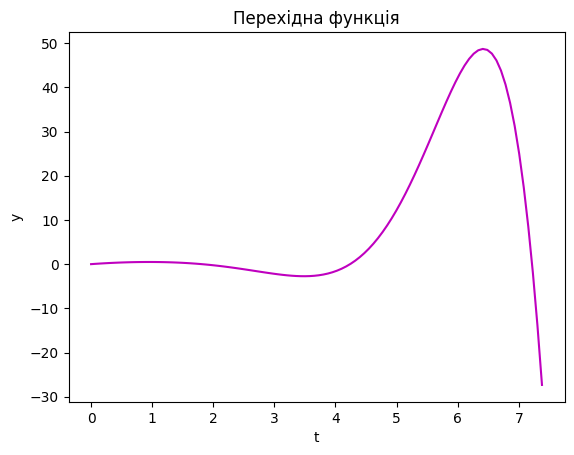

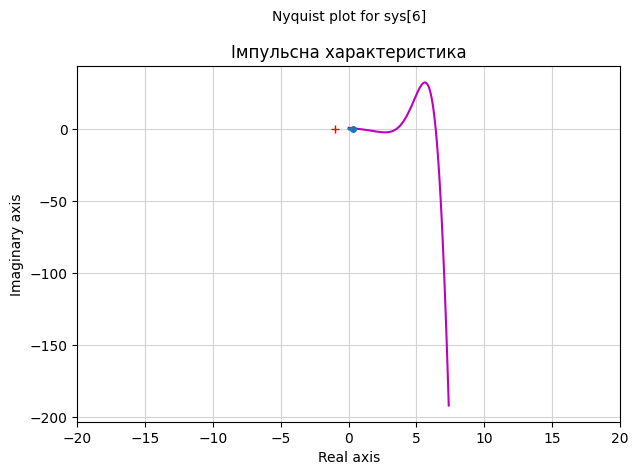

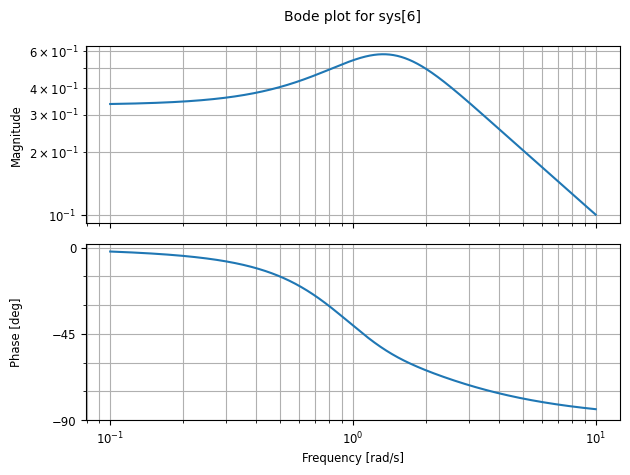

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import tf2zpk, tf2ss
from control import tf, step_response, impulse_response, nyquist_plot, bode, canonical_form

def is_stable(poles, s = 1):
  for p in poles:
    if p > 0:
      s = 0
      break
  if s: return 'stable'
  else: return 'unstable'

z, p, k = tf2zpk(num, den)
TF = tf(num, den)
print(TF)
print(f'z: {z}\np: {p}\nk: {k}')
print('\np real:', p.real)
print(is_stable(p))
# пошук k
new_k = np.arange(1, 100, 0.1)
for ki in new_k:
  s = 1
  new_den = [4+ki, 1, 2, 3 - 2*ki]
  z, p, k = tf2zpk(num, new_den)
  if is_stable(p) == 'stable':
    TF = tf(num, new_den)
    print(TF)
    print(f'\nk: {round(ki, 3)}')
    print('p real:', p.real)
    print('stable')
    break
# модель у просторі станів
from control import ss

# 2. Отримуємо матриці A, B, C, D з scipy
A, B, C, D = tf2ss(num, den)

# 3. Створюємо правильний об'єкт системи за допомогою control.ss()
sys = ss(A, B, C, D)
print(sys)
# графік перехідної функції
t, y = step_response(sys)
plt.figure()
plt.plot(t, y, color = 'm')
plt.title('Перехідна функція')
plt.xlabel('t')
plt.ylabel('y')
# графік імпульсної функції
t, y = impulse_response(sys)
plt.figure()
plt.plot(t, y, color = 'm')
plt.title('Імпульсна характеристика')
plt.xlabel('t')
plt.ylabel('y')
# Годограф Найквіста
nyquist_plot(sys)
plt.xlim(-20, 20)
plt.grid(True)
# АЧХ та ФЧХ
omega, mag, phase = bode(sys)
plt.title('АЧХ та ФЧХ')
plt.tight_layout()
plt.show()
# КНК та КНС
kfk = canonical_form(sys, form='reachable')
kfc = canonical_form(sys, form='observable')
for f in [kfk, kfc]:
  print('\t\t--KФК--') if f == kfk else print("\t\t--КФС--")
  print(f'A: \n{f[0].A}\n')
  print(f'C: \n{f[0].C}\n')

t, y = step_response(sys) # початкова система
t_kfk, y_kfk = step_response(kfk[0])
t_kfc, y_kfc = step_response(kfc[0])
if np.allclose(y, y_kfk) and np.allclose(y, y_kfc): print("Системи ідентичні")
else: print("Системи не ідентичні")